### Практическая часть вебинара

[Перейти сразу к домашней работе](#section_HW)

In [3]:
import pandas as pd

In [4]:
news = pd.read_csv("articles.csv")
print(news.shape)
news.head(3)

(27000, 2)


,doc_id,title
0,6,Заместитель председателяnправительства РФnСерг...
1,4896,Матч 1/16 финала Кубка России по футболу был п...
2,4897,Форвард «Авангарда» Томаш Заборский прокоммент...


In [5]:
users = pd.read_csv("users_articles.csv")
users.head(3)

,uid,articles
0,u105138,"[293672, 293328, 293001, 293622, 293126, 1852]"
1,u108690,"[3405, 1739, 2972, 1158, 1599, 322665]"
2,u108339,"[1845, 2009, 2356, 1424, 2939, 323389]"


In [6]:
#from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary

In [7]:
#предобработка текстов
import re
import numpy as np
from nltk.corpus import stopwords
#from nltk.tokenize import word_tokenize

from razdel import tokenize # https://github.com/natasha/razdel
#!pip install razdel

import pymorphy2  # pip install pymorphy2

In [10]:
#!python -m nltk.downloader stopwords
stopword_ru = stopwords.words('russian')
len(stopword_ru)

morph = pymorphy2.MorphAnalyzer()

In [13]:
def clean_text(text):
    '''
    очистка текста
    
    на выходе очищеный текст
    
    '''
    if not isinstance(text, str):
        text = str(text)
    
    text = text.lower()
    text = text.strip('\n').strip('\r').strip('\t')
    text = re.sub("-\s\r\n\|-\s\r\n|\r\n", '', str(text))

    text = re.sub("[0-9]|[-—.,:;_%©«»?*!@#№$^•·&()]|[+=]|[[]|[]]|[/]|", '', text)
    text = re.sub(r"\r\n\t|\n|\\s|\r\t|\\n", ' ', text)
    text = re.sub(r'[\xad]|[\s+]', ' ', text.strip())
    
    #tokens = list(tokenize(text))
    #words = [_.text for _ in tokens]
    #words = [w for w in words if w not in stopword_ru]
    
    #return " ".join(words)
    return text

cache = {}

def lemmatization(text):
    '''
    лемматизация
        [0] если зашел тип не `str` делаем его `str`
        [1] токенизация предложения через razdel
        [2] проверка есть ли в начале слова '-'
        [3] проверка токена с одного символа
        [4] проверка есть ли данное слово в кэше
        [5] лемматизация слова
        [6] проверка на стоп-слова

    на выходе лист отлемматизированых токенов
    '''

    # [0]
    if not isinstance(text, str):
        text = str(text)
    
    # [1]
    tokens = list(tokenize(text))
    words = [_.text for _ in tokens]

    words_lem = []
    for w in words:
        if w[0] == '-': # [2]
            w = w[1:]
        if len(w)>1: # [3]
            if w in cache: # [4]
                words_lem.append(cache[w])
            else: # [5]
                temp_cach = cache[w] = morph.parse(w)[0].normal_form
                words_lem.append(temp_cach)
    
    words_lem_without_stopwords=[i for i in words_lem if not i in stopword_ru] # [6]
    
    return words_lem_without_stopwords

In [14]:
%%time
#Запускаем очистку текста. Будет долго...
news['title'] = news['title'].apply(lambda x: clean_text(x), 1)

C:\Users\KASHIT~1\AppData\Local\Temp/ipykernel_19040/3066725202.py:15: FutureWarning: Possible nested set at position 39
  text = re.sub("[0-9]|[-—.,:;_%©«»?*!@#№$^•·&()]|[+=]|[[]|[]]|[/]|", '', text)


Wall time: 23.6 s


In [15]:
%%time
#Запускаем лемматизацию текста. Будет очень долго...
news['title'] = news['title'].apply(lambda x: lemmatization(x), 1)

Wall time: 2min 55s


In [16]:
news['title']

0        [заместитель, председатель, правительство, рф,...
1        [матч, финал, кубок, россия, футбол, приостано...
2        [форвард, авангард, томаш, заборский, прокомме...
3        [главный, тренер, кубань, юрий, красножанин, п...
4        [решение, попечительский, совет, владивостокск...
                               ...                        
26995    [учёный, токийский, университет, морской, наук...
26996    [глава, кафедра, отечественный, история, xx, в...
26997    [американский, учёный, уточнить, возраст, расп...
26998    [последний, год, тропический, углеродный, цикл...
26999    [жить, примерно, тыс, год, назад, территория, ...
Name: title, Length: 27000, dtype: object

In [17]:
#сформируем список наших текстов, разбив еще и на пробелы
texts = [t for t in news['title'].values]

# Create a corpus from a list of texts
common_dictionary = Dictionary(texts)
common_corpus = [common_dictionary.doc2bow(text) for text in texts]

In [18]:
common_dictionary[10]

'ватутин'

In [19]:
common_corpus

[[(0, 5),
  (1, 2),
  (2, 1),
  (3, 2),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 4),
  (17, 1),
  (18, 1),
  (19, 4),
  (20, 1),
  (21, 1),
  (22, 3),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 2),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 2),
  (46, 1),
  (47, 2),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 3),
  (59, 1),
  (60, 2),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 3),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 3),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 1),
  (88, 1),
  (89, 1),
  (90, 1),
  (91, 1)

In [20]:
from gensim.models import LdaModel

In [21]:
LdaModel?

Init signature:
LdaModel(
    corpus=None,
    num_topics=100,
    id2word=None,
    distributed=False,
    chunksize=2000,
    passes=1,
    update_every=1,
    alpha='symmetric',
    eta=None,
    decay=0.5,
    offset=1.0,
    eval_every=10,
    iterations=50,
    gamma_threshold=0.001,
    minimum_probability=0.01,
    random_state=None,
    ns_conf=None,
    minimum_phi_value=0.01,
    per_word_topics=False,
    callbacks=None,
    dtype=<class 'numpy.float32'>,
)
Docstring:     
Train and use Online Latent Dirichlet Allocation model as presented in `'Online Learning for LDA' by Hoffman et al.`_

Examples
-------
Initialize a model using a Gensim corpus

.. sourcecode:: pycon

    >>> from gensim.test.utils import common_corpus
    >>>
    >>> lda = LdaModel(common_corpus, num_topics=10)

You can then infer topic distributions on new, unseen documents.

.. sourcecode:: pycon

    >>> doc_bow = [(1, 0.3), (2, 0.1), (0, 0.09)]
    >>> doc_lda = lda[doc_bow]

The model can be updated

In [22]:
%%time
from gensim.models import LdaModel
# Train the model on the corpus.
lda = LdaModel(common_corpus, num_topics=25, id2word=common_dictionary)#, passes=10)

Wall time: 49.9 s


In [23]:
from gensim.test.utils import datapath
# Save model to disk.
temp_file = datapath("model.lda")
lda.save(temp_file)

# Load a potentially pretrained model from disk.
lda = LdaModel.load(temp_file)

In [24]:
# Create a new corpus, made of previously unseen documents.
other_texts = [t for t in news['title'].iloc[:3]]
other_corpus = [common_dictionary.doc2bow(text) for text in other_texts]

unseen_doc = other_corpus[2]
print(other_texts[2])
lda[unseen_doc] 

['форвард', 'авангард', 'томаш', 'заборский', 'прокомментировать', 'игра', 'свой', 'команда', 'матч', 'чемпионат', 'кхл', 'против', 'атланта', 'nnnn', 'провести', 'плохой', 'матч', 'нижний', 'новгород', 'против', 'торпедо', 'настраиваться', 'первый', 'минута', 'включиться', 'работа', 'сказать', 'заборский', 'получиться', 'забросить', 'быстрый', 'гол', 'задать', 'хороший', 'темп', 'поединок', 'мочь', 'играть', 'ещё', 'хороший', 'сторона', 'пять', 'очко', 'выезд', 'девять', 'это', 'хороший']


[(1, 0.03709671),
 (2, 0.023418602),
 (5, 0.053385623),
 (11, 0.107126154),
 (12, 0.047118187),
 (13, 0.21734779),
 (15, 0.20056479),
 (18, 0.21020988),
 (22, 0.089387804)]

In [25]:
x=lda.show_topics(num_topics=25, num_words=7,formatted=False)
topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]

#Below Code Prints Only Words 
for topic,words in topics_words:
    print("topic_{}: ".format(topic)+" ".join(words))

topic_0: млрд компания фонд проект год научный который
topic_1: двигатель испытание министерство обращение пилот лётчик рт
topic_2: компьютерный лечь электроника самарский переставать аркадий bn
topic_3: взрыв снаряд горка потребность прямой донбасс вдохновить
topic_4: год россия это который страна российский nn
topic_5: суд nn статья полиция следствие убийство пациент
topic_6: земля характерный трансляция выбросить палец кит диапазон
topic_7: год спустя глава президент ранее стать новый
topic_8: гражданин ребёнок фронт родитель народный человек женщина
topic_9: год писать это рост рынок мочь напомнить
topic_10: человек это год всё день жизнь который
topic_11: вицепремьер снять таиланд тур золото женский золотой
topic_12: температура градус лекарство соцсеть москва билет компенсировать
topic_13: это который год мочь свой всё время
topic_14: сша ракета американский год северный мочь штат
topic_15: год это nn китай земля эксперимент первый
topic_16: год тыс млн исследование пенсия доход 

In [26]:
#text = news['title'].iloc[0]

def get_lda_vector(text):
    unseen_doc = common_dictionary.doc2bow(text)
    lda_tuple = lda[unseen_doc]
    not_null_topics = dict(zip([i[0] for i in lda_tuple], [i[1] for i in lda_tuple]))

    output_vector = []
    for i in range(25):
        if i not in not_null_topics:
            output_vector.append(0)
        else:
            output_vector.append(not_null_topics[i])
    return np.array(output_vector)

In [27]:
topic_matrix = pd.DataFrame([get_lda_vector(text) for text in news['title'].values])
topic_matrix.columns = ['topic_{}'.format(i) for i in range(25)]
topic_matrix['doc_id'] = news['doc_id'].values
topic_matrix = topic_matrix[['doc_id']+['topic_{}'.format(i) for i in range(25)]]
topic_matrix.head(5)

,doc_id,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,...,topic_15,topic_16,topic_17,topic_18,topic_19,topic_20,topic_21,topic_22,topic_23,topic_24
0,6,0.035230,0.000000,0.00000,0.036808,0.214711,0.000000,0.000000,0.075635,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.630323,0.0,0.000000,0.00000,0.0
1,4896,0.000000,0.000000,0.00000,0.265692,0.000000,0.000000,0.025503,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.046650,0.0,0.126848,0.10575,0.0
2,4897,0.000000,0.037102,0.02342,0.000000,0.000000,0.053373,0.000000,0.000000,0.0,...,0.200421,0.0,0.0,0.210203,0.0,0.000000,0.0,0.089437,0.00000,0.0
3,4898,0.278036,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.028561,0.0,0.000000,0.0,0.000000,0.00000,0.0
4,4899,0.000000,0.000000,0.00000,0.032526,0.000000,0.000000,0.000000,0.351053,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.591941,0.0,0.000000,0.00000,0.0


In [28]:
users.head(3)

,uid,articles
0,u105138,"[293672, 293328, 293001, 293622, 293126, 1852]"
1,u108690,"[3405, 1739, 2972, 1158, 1599, 322665]"
2,u108339,"[1845, 2009, 2356, 1424, 2939, 323389]"


In [29]:
doc_dict = dict(zip(topic_matrix['doc_id'].values, topic_matrix[['topic_{}'.format(i) for i in range(25)]].values))

In [30]:
doc_dict[293622]

array([0.        , 0.        , 0.        , 0.        , 0.21478449,
       0.0501074 , 0.        , 0.        , 0.        , 0.        ,
       0.15325999, 0.        , 0.        , 0.        , 0.1213088 ,
       0.2589891 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.12077783, 0.06985062, 0.        , 0.        ])

In [31]:
user_articles_list = users['articles'].iloc[33]

def get_user_embedding(user_articles_list):
    user_articles_list = eval(user_articles_list)
    user_vector = np.array([doc_dict[doc_id] for doc_id in user_articles_list])
    user_vector = np.mean(user_vector, 0)
    return user_vector

In [32]:
get_user_embedding(user_articles_list)

array([0.02939672, 0.        , 0.        , 0.        , 0.27718735,
       0.11753676, 0.        , 0.05007264, 0.00978851, 0.0090743 ,
       0.04144973, 0.        , 0.        , 0.21783735, 0.03107829,
       0.0414574 , 0.03861272, 0.        , 0.        , 0.0033408 ,
       0.06024208, 0.02003447, 0.02079145, 0.02176456, 0.        ])

In [33]:
user_embeddings = pd.DataFrame([i for i in users['articles'].apply(lambda x: get_user_embedding(x), 1)])
user_embeddings.columns = ['topic_{}'.format(i) for i in range(25)]
user_embeddings['uid'] = users['uid'].values
user_embeddings = user_embeddings[['uid']+['topic_{}'.format(i) for i in range(25)]]
user_embeddings.head(3)

,uid,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,...,topic_15,topic_16,topic_17,topic_18,topic_19,topic_20,topic_21,topic_22,topic_23,topic_24
0,u105138,0.019138,0.000000,0.00000,0.006977,0.121489,0.098730,0.0,0.064354,0.014231,...,0.067459,0.000000,0.000000,0.0,0.0,0.170649,0.054948,0.080188,0.003197,0.006213
1,u108690,0.006840,0.002037,0.00000,0.000000,0.256305,0.042034,0.0,0.026937,0.008050,...,0.025213,0.018129,0.000000,0.0,0.0,0.066558,0.034129,0.037350,0.010608,0.000000
2,u108339,0.013443,0.002856,0.00181,0.000000,0.221891,0.115263,0.0,0.055636,0.003464,...,0.020566,0.003137,0.007039,0.0,0.0,0.124537,0.013439,0.143589,0.016353,0.000000


In [34]:
target = pd.read_csv("users_churn.csv")
target.head(3)

,uid,churn
0,u107120,0
1,u102277,0
2,u102444,0


In [35]:
X = pd.merge(user_embeddings, target, 'left')
X.head(3)

,uid,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,...,topic_16,topic_17,topic_18,topic_19,topic_20,topic_21,topic_22,topic_23,topic_24,churn
0,u105138,0.019138,0.000000,0.00000,0.006977,0.121489,0.098730,0.0,0.064354,0.014231,...,0.000000,0.000000,0.0,0.0,0.170649,0.054948,0.080188,0.003197,0.006213,0
1,u108690,0.006840,0.002037,0.00000,0.000000,0.256305,0.042034,0.0,0.026937,0.008050,...,0.018129,0.000000,0.0,0.0,0.066558,0.034129,0.037350,0.010608,0.000000,1
2,u108339,0.013443,0.002856,0.00181,0.000000,0.221891,0.115263,0.0,0.055636,0.003464,...,0.003137,0.007039,0.0,0.0,0.124537,0.013439,0.143589,0.016353,0.000000,1


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#import itertools

import matplotlib.pyplot as plt

%matplotlib inline

In [37]:
#разделим данные на train/test
X_train, X_test, y_train, y_test = train_test_split(X[['topic_{}'.format(i) for i in range(25)]], 
                                                    X['churn'], random_state=0)

In [38]:
logreg = LogisticRegression()
#обучим 
logreg.fit(X_train, y_train)

LogisticRegression()

In [39]:
#наши прогнозы для тестовой выборки
preds = logreg.predict_proba(X_test)[:, 1]
preds[:10]

array([0.24478845, 0.01679247, 0.36529611, 0.30297389, 0.00642605,
       0.0946589 , 0.12025782, 0.23346637, 0.02318627, 0.21036705])

In [40]:
from sklearn.metrics import f1_score, roc_auc_score, precision_score, classification_report, precision_recall_curve, confusion_matrix

In [41]:
import itertools

In [42]:
precision, recall, thresholds = precision_recall_curve(y_test, preds)
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds[ix], 
                                                                        fscore[ix],
                                                                        precision[ix],
                                                                        recall[ix]))

Best Threshold=0.274311, F-Score=0.701, Precision=0.643, Recall=0.771


In [43]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1650  105]
 [  57  188]]


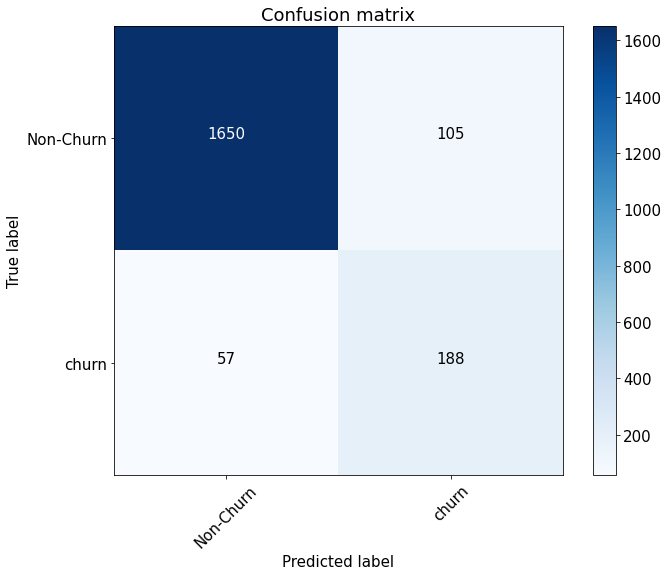

In [44]:
#мы уже нашли ранее "оптимальный" порог, когда максимизировали f_score
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, preds>thresholds[ix])
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-Churn', 'churn'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [45]:
roc_auc_score(y_test, preds)

0.9535089249374964

<a id='section_HW'></a>

#### Модифицировать код функции get_user_embedding таким образом, чтобы считалось не среднее (как в примере np.mean), а медиана. Применить такое преобразование к данным, обучить модель прогнозирования оттока и посчитать метрики качества и сохранить их: roc auc, precision/recall/f_score (для 3 последних - подобрать оптимальный порог с помощью precision_recall_curve, как это делалось на уроке)

In [46]:
def get_user_embedding_median(user_articles_list):
    user_articles_list = eval(user_articles_list)
    user_vector = np.array([doc_dict[doc_id] for doc_id in user_articles_list])
    user_vector = np.median(user_vector, 0)
    return user_vector

In [58]:
get_user_embedding_median(user_articles_list)

array([0.        , 0.        , 0.        , 0.        , 0.24258014,
       0.01850964, 0.        , 0.04130366, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.13962317, 0.02117557,
       0.04641335, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [59]:
user_embeddings = pd.DataFrame([i for i in users['articles'].apply(lambda x: get_user_embedding_median(x), 1)])
user_embeddings.columns = ['topic_{}'.format(i) for i in range(25)]
user_embeddings['uid'] = users['uid'].values
user_embeddings = user_embeddings[['uid']+['topic_{}'.format(i) for i in range(25)]]
user_embeddings.head(3)

,uid,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,...,topic_15,topic_16,topic_17,topic_18,topic_19,topic_20,topic_21,topic_22,topic_23,topic_24
0,u105138,0.0,0.0,0.0,0.0,0.073935,0.025054,0.0,0.043582,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.147447,0.000000,0.034925,0.0,0.0
1,u108690,0.0,0.0,0.0,0.0,0.302511,0.000000,0.0,0.016160,0.0,...,0.015008,0.0,0.0,0.0,0.0,0.000000,0.021505,0.000000,0.0,0.0
2,u108339,0.0,0.0,0.0,0.0,0.128247,0.099509,0.0,0.027568,0.0,...,0.012062,0.0,0.0,0.0,0.0,0.127725,0.000000,0.154765,0.0,0.0


In [60]:
target = pd.read_csv("users_churn.csv")
target.head(3)

,uid,churn
0,u107120,0
1,u102277,0
2,u102444,0


In [61]:
X = pd.merge(user_embeddings, target, 'left')
X.head(3)

,uid,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,...,topic_16,topic_17,topic_18,topic_19,topic_20,topic_21,topic_22,topic_23,topic_24,churn
0,u105138,0.0,0.0,0.0,0.0,0.073935,0.025054,0.0,0.043582,0.0,...,0.0,0.0,0.0,0.0,0.147447,0.000000,0.034925,0.0,0.0,0
1,u108690,0.0,0.0,0.0,0.0,0.302511,0.000000,0.0,0.016160,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.021505,0.000000,0.0,0.0,1
2,u108339,0.0,0.0,0.0,0.0,0.128247,0.099509,0.0,0.027568,0.0,...,0.0,0.0,0.0,0.0,0.127725,0.000000,0.154765,0.0,0.0,1


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X[['topic_{}'.format(i) for i in range(25)]], 
                                                    X['churn'], random_state=0)

logreg = LogisticRegression()
#обучим 
logreg.fit(X_train, y_train)
#наши прогнозы для тестовой выборки
preds = logreg.predict_proba(X_test)[:, 1]
preds[:10]

array([0.10776274, 0.00569956, 0.47533647, 0.17582364, 0.00859343,
       0.09884824, 0.03849872, 0.13326235, 0.03538595, 0.18217363])

In [63]:
precision, recall, thresholds = precision_recall_curve(y_test, preds)
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds[ix], 
                                                                        fscore[ix],
                                                                        precision[ix],
                                                                        recall[ix]))
median = {'threshold': thresholds[ix], 'f_score': fscore[ix], 'precision': precision[ix], 'recall': recall[ix]}

Best Threshold=0.280461, F-Score=0.779, Precision=0.720, Recall=0.849


In [64]:
median['roc_auc'] = roc_auc_score(y_test, preds)
roc_auc_score(y_test, preds)

0.9689958718530147

#### Повторить п.2, но используя уже не медиану, а max

In [65]:
def get_user_embedding_max(user_articles_list):
    user_articles_list = eval(user_articles_list)
    user_vector = np.array([doc_dict[doc_id] for doc_id in user_articles_list])
    user_vector = np.max(user_vector,0)
    return user_vector

get_user_embedding_max(user_articles_list)

array([0.12204384, 0.        , 0.        , 0.        , 0.7283687 ,
       0.5821988 , 0.        , 0.13978228, 0.03650454, 0.04006622,
       0.24869835, 0.        , 0.        , 0.54497421, 0.09062178,
       0.0978188 , 0.23167631, 0.        , 0.        , 0.0200448 ,
       0.32815722, 0.10368473, 0.12474869, 0.13058735, 0.        ])

In [66]:
user_embeddings = pd.DataFrame([i for i in users['articles'].apply(lambda x: get_user_embedding_max(x), 1)])
user_embeddings.columns = ['topic_{}'.format(i) for i in range(25)]
user_embeddings['uid'] = users['uid'].values
user_embeddings = user_embeddings[['uid']+['topic_{}'.format(i) for i in range(25)]]
user_embeddings.head(3)

,uid,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,...,topic_15,topic_16,topic_17,topic_18,topic_19,topic_20,topic_21,topic_22,topic_23,topic_24
0,u105138,0.114826,0.000000,0.00000,0.024568,0.366282,0.468214,0.0,0.204055,0.058278,...,0.258989,0.000000,0.000000,0.0,0.0,0.393790,0.208913,0.219899,0.019180,0.037277
1,u108690,0.041040,0.012220,0.00000,0.000000,0.443500,0.229126,0.0,0.092821,0.048298,...,0.070311,0.077285,0.000000,0.0,0.0,0.215902,0.086818,0.124004,0.032708,0.000000
2,u108339,0.080660,0.017133,0.01086,0.000000,0.607510,0.201479,0.0,0.164424,0.020786,...,0.058430,0.018825,0.027168,0.0,0.0,0.248710,0.080636,0.290933,0.051288,0.000000


In [68]:
X = pd.merge(user_embeddings, target, 'left')
X_train, X_test, y_train, y_test = train_test_split(X[['topic_{}'.format(i) for i in range(25)]], 
                                                    X['churn'], random_state=0)
logreg = LogisticRegression()
#обучим 
logreg.fit(X_train, y_train)
preds = logreg.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, preds)
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds[ix], 
                                                                        fscore[ix],
                                                                        precision[ix],
                                                                        recall[ix]))

max_t = {'threshold': thresholds[ix], 'f_score': fscore[ix], 'precision': precision[ix], 'recall': recall[ix]}

Best Threshold=0.323691, F-Score=0.795, Precision=0.755, Recall=0.841


In [69]:
max_t['roc_auc'] = roc_auc_score(y_test, preds)

roc_auc_score(y_test, preds)

0.9761823361823361

### Использование медианы и max повысило точность модели